<a href="https://colab.research.google.com/github/shubhamgautam1211/Machine-Learning-Standalone/blob/main/SG_7_Linear_Regression_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Basics**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Read the data from provided dir
data = pd.read_csv("/content/drive/MyDrive/simple_linear_data.csv")
data.head(3)

,G2,G3
0,30,30
1,25,30
2,40,50


In [ ]:
# Add column which has all 1s
# The idea is that weight corresponding to this column is equal to intercept
# This way it is efficient and easier to handle the bias/intercept term

data.insert(0,'Ones',1)
data.head(2)

,Ones,G2,G3
0,1,30,30
1,1,25,30


In [ ]:
# Print the dataframe rows

print(data.iloc[40:56])

    Ones  G2   G3
40     1  50   55
41     1  60   60
42     1  90   90
43     1  40   55
44     1  50   45
45     1  40   30
46     1  60   55
47     1  95  100
48     1  75   70
49     1  35   35
50     1  65   65
51     1  65   65
52     1  55   50
53     1  50   55
54     1  65   65
55     1  45   50


In [ ]:
# Define X (input features) and y (output feature) 
X = data. values[:,0:-1]
#X = data.iloc[:,[0,1]]   #Also possible using iloc to get rows,columns
Y = data. values[:,-1]


In [ ]:
X_shape = X.shape
X_type  = type(X)
y_shape = Y.reshape(395,1).shape
y_type  = type(Y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(395, 2)
y: Type-<class 'numpy.ndarray'>, Shape-(395, 1)


Let us visualize the relationship between X and y

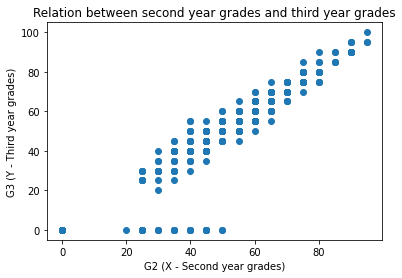

In [ ]:
# DO NOT EDIT THIS CODE CELL
plt.scatter(X[:,1],Y)
plt.title('Relation between second year grades and third year grades')
plt.xlabel('G2 (X - Second year grades)')
plt.ylabel('G3 (Y - Third year grades)')
plt.show()

##### Let us start implementing linear regression from scratch. Just follow code cells, see hints if required.

In [ ]:
def predict(X, weights):
    ### START CODE HERE ###
    y_pred = np.dot(X,weights)
    ### END CODE HERE ###
    
    assert (y_pred.shape==(X.shape[0],)), 'Wrong implementation of predict function. Check carefully'
    
    return y_pred

In [ ]:
def mean_squared_error(y_true, y_pred) : 
    ### START CODE HERE ###
    loss = np.mean((y_true-y_pred)**2)/2
    ### END CODE HERE ###
    
    return loss

In [ ]:
def gradient(X, y_true, y_pred,weights):
    # Initialize the gradient vector for w0 (intercept/bias) and w1 respectively
    grad = np.zeros(2,)
    
    ### START CODE HERE ###
    
    grad[0] = np.mean(y_pred-y_true)
    grad[1] = np.mean((y_pred-y_true)*X[:,1])
    
    ### END CODE HERE ###
    
    return grad

In [ ]:
def gradient_descent(X, y, alpha=0.0001, max_iterations=100):
    # Initialise weights vector of random values of size (2,1)
    weights = np.random.rand(2)
    # Initialize a list to record all the losses 
    losses  = []
  
    ### START CODE HERE ###
    for iter in range(max_iterations):
        y_pred=predict(X,weights)
        loss=mean_squared_error(Y,y_pred)
        losses.append(loss)
        grads=gradient(X,Y,y_pred,weights)
        weights[0]=weights[0]-alpha*grads[0]
        weights[1]=weights[1]-alpha*grads[1]
    print('weights[0]:',weights[0])
    print('weights[1]:',weights[1])
    ### END CODE HERE ###
    
    return weights, losses

##### Congratulations! You have implemented linear regression from scratch. Let's see this in action.

In [ ]:
# Perform gradient descent
optimal_weights, losses = gradient_descent(X,Y,0.0001,100)

weights[0]: 0.3808875546296515
weights[1]: 0.9800142511980504


In [ ]:
# DO NOT CHANGE THE FOLLOWING CODE CELLS
# Print final loss
print("Mean squared error:", losses[-1])

Mean squared error: 50.37794874323334


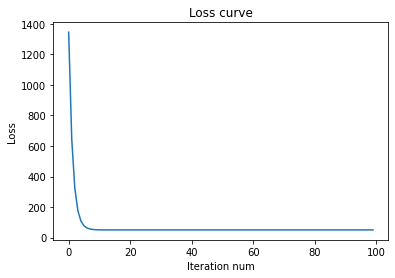

In [ ]:
# Plot the loss curve
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Make predictions using trained weights
y_pred = predict(X, optimal_weights)
print(y_pred)

[29.78131509 24.88124383 39.5814576  68.98188514 49.38160011 73.88195639
 59.18174263 24.88124383 88.58217016 73.88195639 39.5814576  59.18174263
 68.98188514 49.38160011 78.78202765 68.98188514 68.98188514 49.38160011
 24.88124383 49.38160011 68.98188514 73.88195639 73.88195639 64.08181388
 44.48152886 44.48152886 59.18174263 78.78202765 54.28167137 59.18174263
 54.28167137 78.78202765 78.78202765 49.38160011 68.98188514 34.68138635
 78.78202765 78.78202765 59.18174263 64.08181388 49.38160011 59.18174263
 88.58217016 39.5814576  49.38160011 39.5814576  59.18174263 93.48224142
 73.88195639 34.68138635 64.08181388 64.08181388 54.28167137 49.38160011
 64.08181388 44.48152886 73.88195639 73.88195639 49.38160011 78.78202765
 54.28167137 39.5814576  49.38160011 44.48152886 49.38160011 73.88195639
 64.08181388 34.68138635 44.48152886 78.78202765 73.88195639 49.38160011
 29.78131509 59.18174263 59.18174263 44.48152886 54.28167137 54.28167137
 39.5814576  24.88124383 59.18174263 49.38160011 29

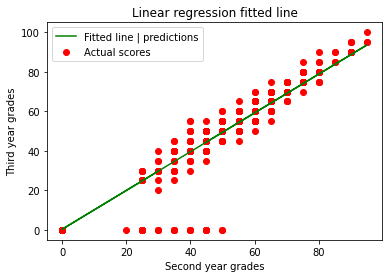

In [ ]:
# Visualize the results by plotting it
plt.scatter(X[:,1], Y, c='r', label='Actual scores')
plt.plot(X[:,1], y_pred, c='g', label='Fitted line | predictions')
plt.legend()
plt.title("Linear regression fitted line")
plt.xlabel("Second year grades")
plt.ylabel("Third year grades")
plt.show()